In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, mean_squared_error,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset
com = pd.read_csv("Company_Data.csv")
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# EDA

In [4]:
com.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
com.shape

(400, 11)

In [7]:
label_encoder = preprocessing.LabelEncoder()
for i in com.columns:
    print(i)
    if com[i].dtypes == object:
        com[i] = label_encoder.fit_transform(com[i])
    else:
        pass

Sales
CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US


In [8]:
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [9]:
x = com.iloc[:,1:]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [10]:
y = com['Sales']
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [11]:
#splitting the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

# Decision Tree Regressor

In [12]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [13]:
preds = model.predict(x_test)

In [14]:
preds

array([ 6.40428571,  2.54571429,  9.25822222,  5.4032    ,  6.84856061,
        5.4032    , 12.05272727,  6.40428571,  9.25822222,  9.25822222,
        6.84856061,  6.84856061,  9.74541667,  6.84856061,  9.25822222,
        9.74541667,  9.25822222, 12.05272727,  6.84856061,  6.84856061,
        9.74541667,  6.84856061,  5.4032    ,  6.84856061,  5.4032    ,
        6.84856061,  6.84856061,  6.40428571,  6.84856061,  6.84856061,
        9.25822222,  9.25822222,  6.84856061,  5.4032    ,  9.25822222,
        6.84856061,  5.4032    ,  6.84856061,  9.25822222,  5.4032    ,
        2.54571429,  6.84856061,  9.74541667, 12.05272727,  9.25822222,
        6.84856061,  6.84856061,  9.74541667,  6.84856061,  6.84856061,
        9.74541667,  6.84856061,  6.84856061,  9.25822222,  6.84856061,
        5.4032    ,  6.84856061,  9.25822222, 12.05272727,  9.25822222,
        9.25822222,  9.25822222,  9.9175    ,  6.84856061,  6.84856061,
        6.84856061,  9.25822222,  6.84856061,  5.4032    ,  9.25

In [15]:
pd.crosstab(y_test,preds)

col_0,2.545714,5.403200,6.404286,6.848561,9.258222,9.745417,9.917500,12.052727
Sales,,,,,,,,
0.91,0,1,0,0,0,0,0,0
2.23,0,1,0,0,0,0,0,0
2.86,1,0,0,0,0,0,0,0
3.02,0,0,1,0,0,0,0,0
3.07,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
13.44,0,0,0,0,1,0,0,0
13.55,0,0,0,0,0,0,0,1
13.91,0,0,0,0,0,0,0,1


In [16]:
mean_squared_error(y_test,model.predict(x_test))

4.016841281436862

In [17]:
label = x_test.columns
label

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [18]:
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn = ['Sales']

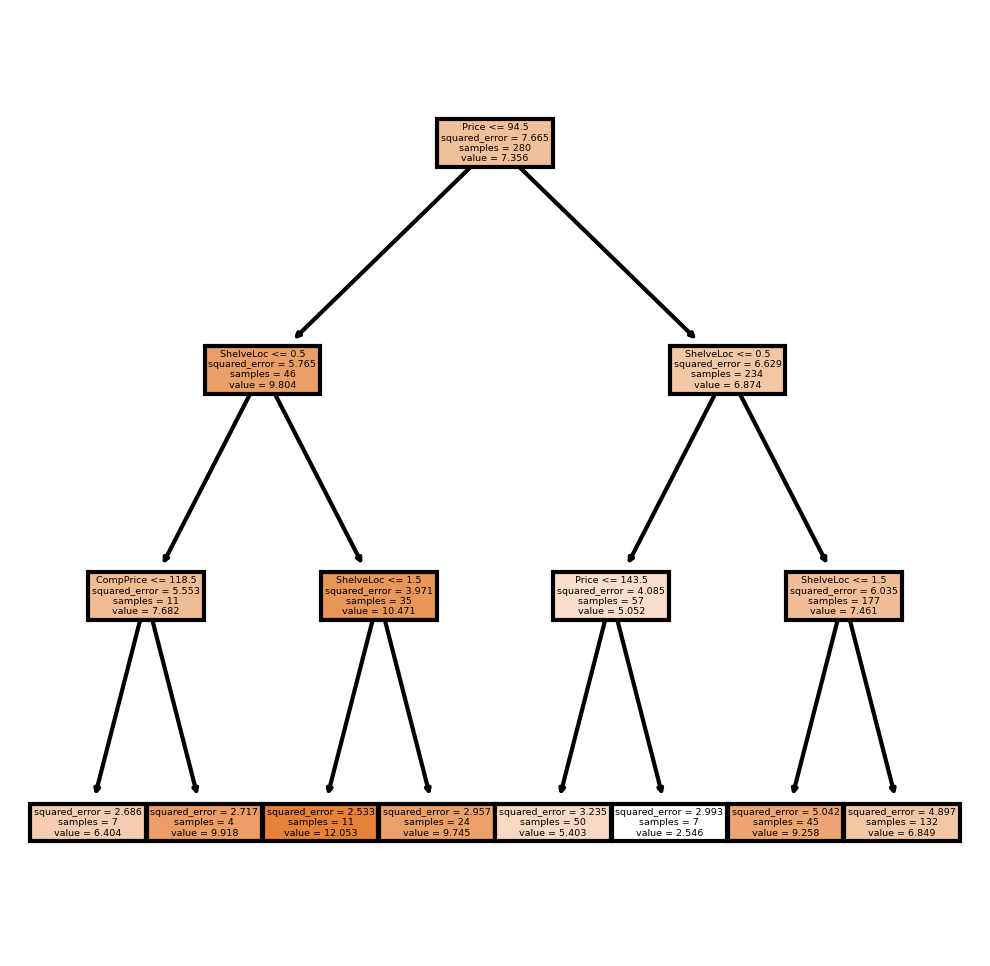

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(model,feature_names= fn, class_names=cn, filled=True);

In [20]:
#Accuracy
model.score(x_test, y_test)

0.5263023772875564

# Decision Tree Classifier

In [21]:
com1 = pd.read_csv('Company_Data.csv')
com1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [22]:
com1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [23]:
com1['Status'] = com1['Sales'].apply(lambda Sales: 'Low' if Sales <= 7.5 else 'High')
com1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [24]:
com1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
Status          object
dtype: object

In [25]:
encoder = preprocessing.LabelEncoder()

for i in com1.columns:
    print(i)
    if com1[i].dtypes == object:
        com1[i] = encoder.fit_transform(com1[i])
    else:
        pass

Sales
CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US
Status


In [26]:
com1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
 11  Status       400 non-null    int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 31.4 KB


In [27]:
com1.drop(['Sales'],axis=1,inplace=True)

In [28]:
com1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [29]:
x1 = com1.iloc[:,0:10]

In [30]:
x1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [31]:
y1 = com1.iloc[:,10]

In [32]:
y1.head()

0    0
1    0
2    0
3    1
4    1
Name: Status, dtype: int32

In [33]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.3 , random_state = 42)

In [34]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
model1.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [35]:
preds1=model1.predict(x_test1)
preds1

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [36]:
print(confusion_matrix(y_test1,preds1))

[[16 49]
 [ 4 51]]


[Text(0.5, 0.8333333333333334, 'X[4] <= 90.5\nentropy = 0.998\nsamples = 280\nvalue = [133, 147]'),
 Text(0.25, 0.5, 'X[5] <= 0.5\nentropy = 0.422\nsamples = 35\nvalue = [32, 3]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.75, 0.5, 'X[5] <= 0.5\nentropy = 0.978\nsamples = 245\nvalue = [101, 144]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.616\nsamples = 59\nvalue = [9, 50]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.0\nsamples = 186\nvalue = [92, 94]')]

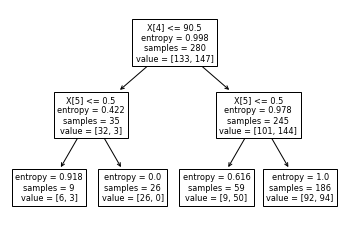

In [37]:
tree.plot_tree(model1)

[Text(0.5, 0.8333333333333334, 'Price <= 90.5\nentropy = 0.998\nsamples = 280\nvalue = [133, 147]\nclass = High'),
 Text(0.25, 0.5, 'ShelveLoc <= 0.5\nentropy = 0.422\nsamples = 35\nvalue = [32, 3]\nclass = Low'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3]\nclass = Low'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]\nclass = Low'),
 Text(0.75, 0.5, 'ShelveLoc <= 0.5\nentropy = 0.978\nsamples = 245\nvalue = [101, 144]\nclass = High'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.616\nsamples = 59\nvalue = [9, 50]\nclass = High'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.0\nsamples = 186\nvalue = [92, 94]\nclass = High')]

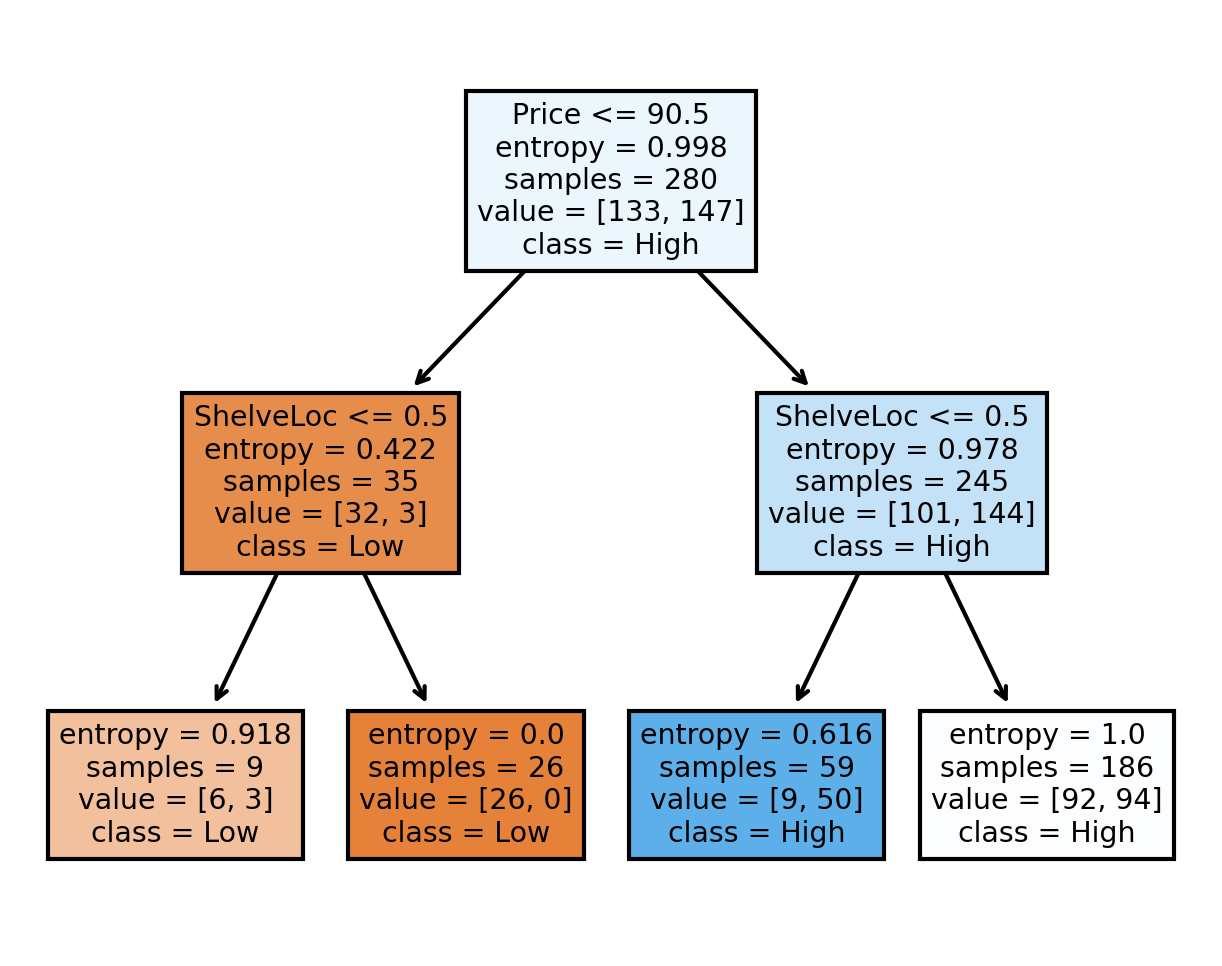

In [38]:
fn = com1.columns
cn = ['Low','High']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (5,4),dpi=300)
tree.plot_tree(model1, feature_names=fn, class_names=cn, filled=True)

In [39]:
#Accuracy
np.mean(preds1==y_test1)

0.5583333333333333

 Decision tree regression accuracy is 52% and the accuracy of the Decision tree Classifier accuracy is 55%
Both are poor models, But the Classifier model accuracy is higher than Regression model accuracy
Hence, Classifier model can be considered.